<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/ML_Assessment_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (768, 9)

First 5 Rows:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               76

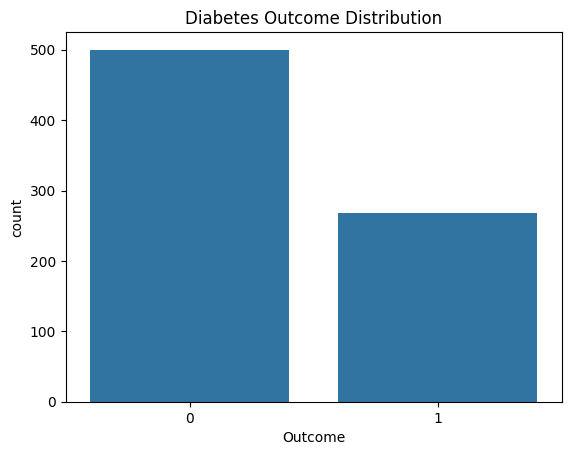

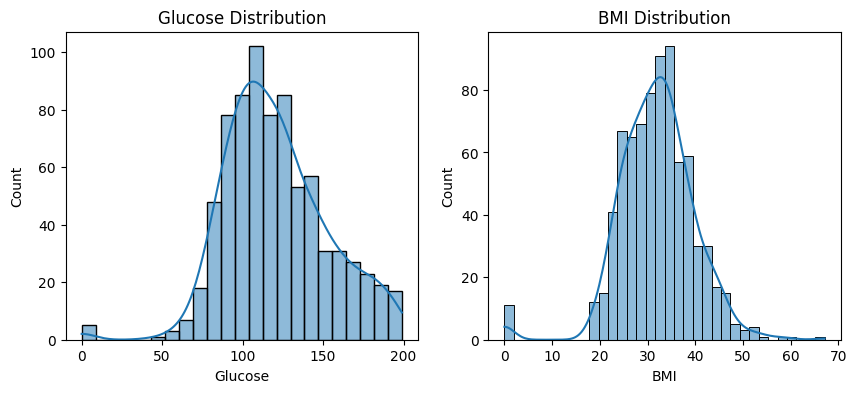


Zero values before cleaning:
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11

Stats After Cleaning:

          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  768.000000     768.000000     768.000000  768.000000  768.000000
mean   121.656250      72.386719      29.108073  140.671875   32.455208
std     30.438286      12.096642       8.791221   86.383060    6.875177
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.750000      64.000000      25.000000  121.500000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    140.250000      80.000000      32.000000  127.250000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000

MODEL PERFORMANCE
----------------------------------------
Accuracy : 0.7619047619047619
Precision: 0.6477272727272727
Recall   : 0.7037037037037037
F1 Score : 0.6745562130177515

Classification Report:

              preci

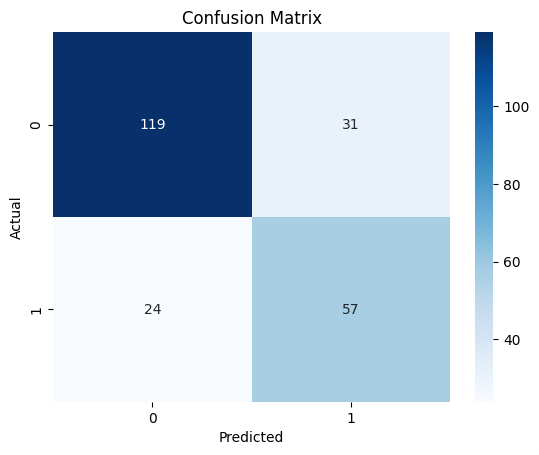

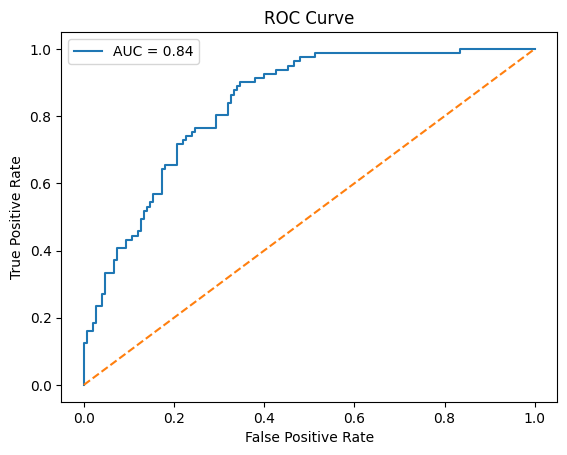


FINAL DIABETES PREDICTION
----------------------------------------
 The medical details indicate the patient IS LIKELY TO HAVE DIABETES.
Probability of Diabetes: 80.01%


In [1]:
# MACHINE LEARNING FOUNDATIONS – PROJECT
# DIABETES PREDICTION USING LOGISTIC REGRESSION

# PART 1: IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

# PART 2: LOAD DATASET
df = pd.read_csv("/content/diabetes.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nDataset Info:\n")
print(df.info())

# PART 3: EXPLORATORY DATA ANALYSIS
# Descriptive statistics
print("\nDescriptive Statistics:\n")
print(df.describe())
# Target variable analysis
print("\nOutcome Distribution:")
print(df["Outcome"].value_counts())
print("\nOutcome Percentage:")
print(df["Outcome"].value_counts(normalize=True) * 100)
# Outcome visualization
sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()
# Feature distributions
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df["Glucose"], kde=True)
plt.title("Glucose Distribution")
plt.subplot(1,2,2)
sns.histplot(df["BMI"], kde=True)
plt.title("BMI Distribution")

plt.show()

# PART 4: DATA PREPROCESSING
# Medical insight:
# Zero values in some medical fields are biologically impossible
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("\nZero values before cleaning:")
for col in cols_with_zero:
    print(col, ":", (df[col] == 0).sum())

# Replace 0 with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Median Imputation (robust for medical data)
df[cols_with_zero] = df[cols_with_zero].apply(
    lambda col: col.fillna(col.median())
)
print("\nStats After Cleaning:\n")
print(df[cols_with_zero].describe())

# PART 5: FEATURE & TARGET
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# PART 6: TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# PART 7: FEATURE SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PART 8: MODEL TRAINING
model = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train_scaled, y_train)

# PART 9: MODEL EVALUATION
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("\nMODEL PERFORMANCE")
print("-" * 40)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# PART 10: FINAL PREDICTION
sample_input = X.iloc[[0]]
sample_scaled = scaler.transform(sample_input)

prediction = model.predict(sample_scaled)[0]
probability = model.predict_proba(sample_scaled)[0][1]
print("\nFINAL DIABETES PREDICTION")
print("-" * 40)

if prediction == 1:
    print(" The medical details indicate the patient IS LIKELY TO HAVE DIABETES.")
else:
    print(" The medical details indicate the patient is NOT LIKELY TO HAVE DIABETES.")

print(f"Probability of Diabetes: {probability * 100:.2f}%")
